In [2]:
from google.colab import files
uploaded = files.upload()
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['weatherAUS.csv']))

Saving weatherAUS.csv to weatherAUS.csv


In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [0]:
df.drop(['RISK_MM'], axis=1, inplace=True)
df.drop(['RainTomorrow'], axis=1, inplace=True)

Removing Rain tomorrow as we will not know in advance if it will rain tomorrow. 
The Risk mm column is dropped due to the guidance in the kaggle dataset.

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [0]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


seperating categorical variables

In [0]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [0]:
df[categorical].head()


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,2008-12-01,Albury,W,W,WNW,No
1,2008-12-02,Albury,WNW,NNW,WSW,No
2,2008-12-03,Albury,WSW,W,WSW,No
3,2008-12-04,Albury,NE,SE,E,No
4,2008-12-05,Albury,W,ENE,NW,No


In [0]:
for var in categorical: 
    
    print(df[var].value_counts())

2016-06-15    49
2016-05-17    49
2016-11-08    49
2016-10-07    49
2016-06-09    49
              ..
2007-12-30     1
2007-12-31     1
2007-12-14     1
2007-11-20     1
2007-11-30     1
Name: Date, Length: 3436, dtype: int64
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
NorfolkIsland       2964

In [0]:
df['Date'].dtypes

dtype('O')

In [0]:
for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels


Engineering the date Type variable

In [0]:

df['Date'] = pd.to_datetime(df['Date'])


In [0]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [0]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,2008,12,5


Dropping the date column

In [0]:
df.drop('Date', axis=1, inplace = True)

In [0]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,2008,12,5


Seperating Numerical values

In [0]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [0]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [0]:
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

Visualizing Outliers

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


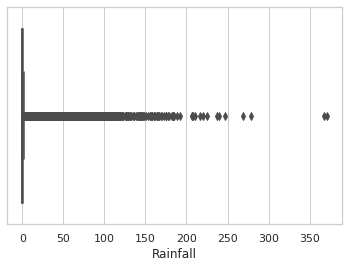

In [0]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Rainfall"])

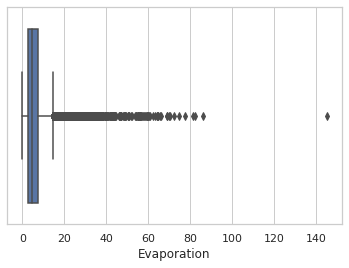

In [0]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Evaporation"])

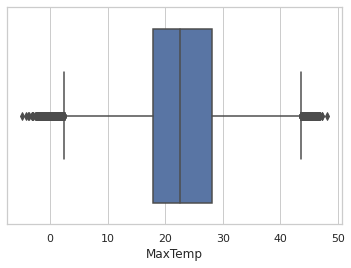

In [0]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["MaxTemp"])

In [0]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MinTemp           9.2
MaxTemp          10.3
Rainfall          0.8
Evaporation       4.8
Sunshine          5.7
WindGustSpeed    17.0
WindSpeed9am     12.0
WindSpeed3pm     11.0
Humidity9am      26.0
Humidity3pm      29.0
Pressure9am       9.5
Pressure3pm       9.6
Cloud9am          6.0
Cloud3pm          5.0
Temp9am           9.3
Temp3pm           9.8
Year              4.0
Month             6.0
Day              15.0
dtype: float64


The correlation between a categorical and non categorical value is still a debate, there are some measures i found such as mutual information, but for now i am going ahead with the numerical values for correlation analysis.

In [0]:
correlation = df.corr()

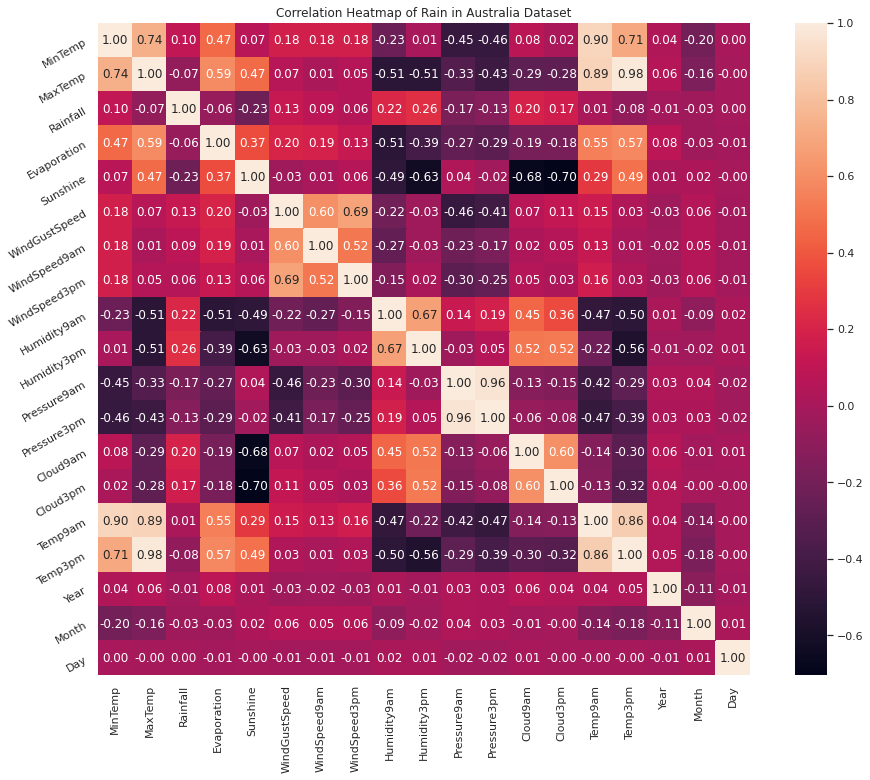

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

The temprature variables are highly correlated.

Rainfall and cloud variables have low correlations which is unusual and suggests that Rain in australia is highly unpredictable just by looking at the cloudiness.

The maximum temprature is highly correlated with sunshine and evaporation which makes sense.

The temprature variables follow very similar trends with relation to humidity and evaporation.


Further investigation on the findings can be done by scatter plots to visualize the relations.

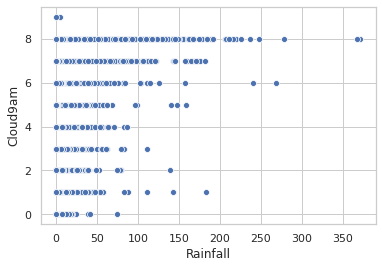

In [0]:
ax = sns.scatterplot(x="Rainfall", y="Cloud9am",data=df)

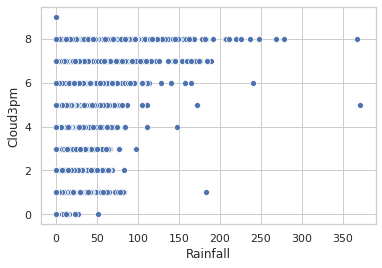

In [0]:
ax = sns.scatterplot(x="Rainfall", y="Cloud3pm",data=df)

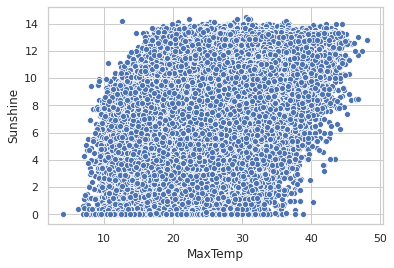

In [0]:
ax = sns.scatterplot(x="MaxTemp", y="Sunshine",data=df)

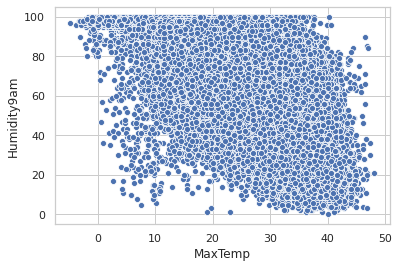

In [0]:
ax = sns.scatterplot(x="MaxTemp", y="Humidity9am",data=df)

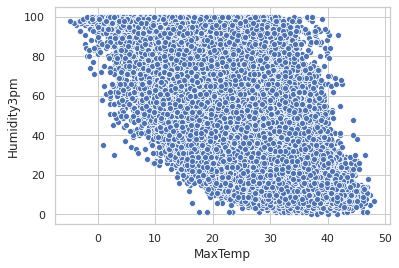

In [0]:
ax = sns.scatterplot(x="MaxTemp", y="Humidity3pm",data=df)

The scatter plots are in accordance with the findings from the heatmap.

In [0]:
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

Treating missing values by median 

In [0]:
for col in numerical:
  col_median=df[col].median()
  df[col].fillna(col_median, inplace=True) 

In [0]:
df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [0]:
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  ...      Year     Month       Day
count  142193.0  142193.0  142193.0  ...  142193.0  142193.0  142193.0
mean       12.0      23.0       2.0  ...    2013.0       6.0      16.0
std         6.0       7.0       8.0  ...       3.0       3.0       9.0
min        -8.0      -5.0       0.0  ...    2007.0       1.0       1.0
25%         8.0      18.0       0.0  ...    2011.0       3.0       8.0
50%        12.0      23.0       0.0  ...    2013.0       6.0      16.0
75%        17.0      28.0       1.0  ...    2015.0       9.0      23.0
max        34.0      48.0     371.0  ...    2017.0      12.0      31.0

[8 rows x 19 columns] 2


Checking for negative values

In [0]:
print(df[numerical].where(df[numerical] < 0).count())

MinTemp          3406
MaxTemp           105
Rainfall            0
Evaporation         0
Sunshine            0
WindGustSpeed       0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am           420
Temp3pm           171
Year                0
Month               0
Day                 0
dtype: int64


Only the temprature values are negative, which is possible.

Treating outliers


In [0]:
df.shape

(142193, 24)

Considering removing Outliers

In [0]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

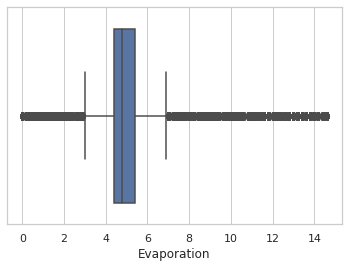

In [0]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_out["Evaporation"])

In [0]:
df[numerical].shape

(142193, 19)

In [0]:
df_out[numerical].shape

(109459, 19)

Simply removing the outliers results in a huge decrease in data,so it is not a suitable approach, also as we are trying to predict the average, replacing the outliers with a single value such as mode or median could siginificantly create bias towards one value in the distribution of the data in the columns other than the temprature.

The distribution of the temprature columns is fairly normal and hence:

1)log tranformation is the selected approach for treating outliers in the columns other than temprature such as humidity and evaporation,

2)median is the selected approach for treating outliers in the temprature columns.


Checking for negative values


In [0]:
print(df_out["Evaporation"].where(df_out["Evaporation"] < 0).count())

0


In [0]:
print(df["Evaporation"].where(df["Evaporation"] < 0).count())

0


In [0]:
print(df["Sunshine"].where(df["Sunshine"] < 0).count())

0


In [0]:
print(df["WindGustSpeed"].where(df["WindGustSpeed"] < 0).count())

0


Considering log transformation for treating outliers

In [0]:
import numpy as np
x = df["Evaporation"].map(lambda i: np.log(i) if i > 0 else 0) 

In [0]:
print(x.skew())

-1.2990759887312748


In [0]:
print(df["Evaporation"].skew())

5.140075447128676


Visualizing the change in distribution

Before transformation

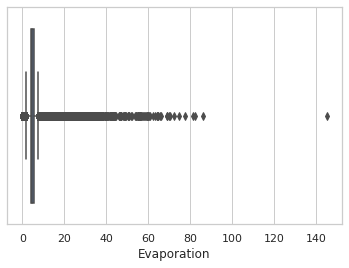

In [0]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Evaporation"])

After Transformation

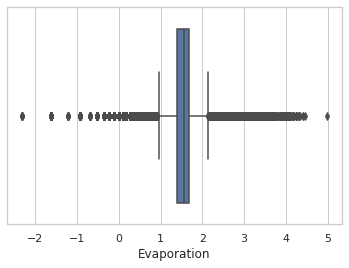

In [0]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=x)

The results show that the number of outliers and the skew has improved, But it produces negative values, hence using median for treating outliers too.

In [0]:
temp = df["Evaporation"]

Before treating outliers.

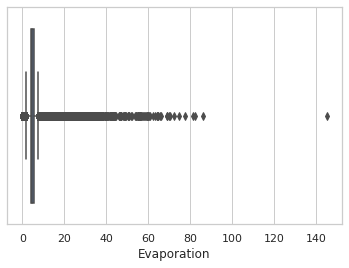

In [0]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=temp)

In [0]:
for col in numerical:
  col_median=df[col].median()
  df[col] = np.where(df[col] > (Q3[col] + 1.5 * IQR[col])   , col_median,df[col])
  df[col] = np.where(df[col] < (Q1[col] - 1.5 * IQR[col])   , col_median,df[col])

After treating outliers.

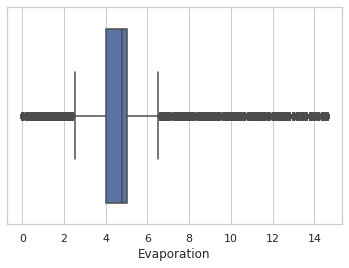

In [0]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Evaporation"])

Checking date for invalid values

In [0]:
print(df["Rainfall"].where(df["Rainfall"] < 0).count())

0


In [0]:
print(df["Month"].where(df["Month"] < 0).count())

0


In [0]:
print(df["Year"].where(df["Year"] < 0).count())

0


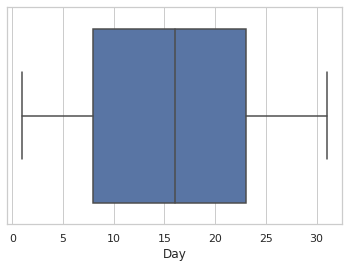

In [0]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Day"])

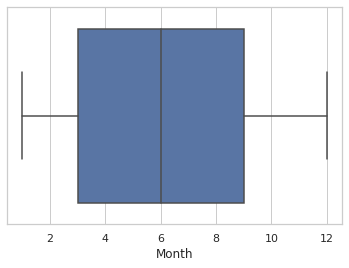

In [0]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Month"])

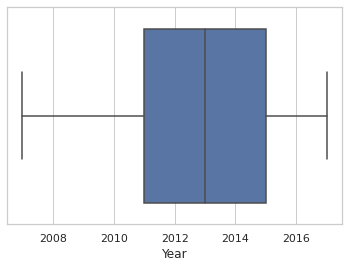

In [0]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Year"])

Now after the treating of outliers and missing data the target variable average temprature is calculated

In [0]:
df['AverageTemp'] = df[['MaxTemp', 'MinTemp']].mean(axis=1)

In [0]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day,AverageTemp
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,2008.0,12.0,1.0,18.15
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,2008.0,12.0,2.0,16.25
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,2008.0,12.0,3.0,19.30
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,2008.0,12.0,4.0,18.60
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,2008.0,12.0,5.0,24.90


In [0]:
y = df['AverageTemp']

In [0]:
X = df
X.drop('AverageTemp', axis=1, inplace = True)
X.drop('MinTemp', axis=1, inplace = True)
X.drop('MaxTemp', axis=1, inplace = True)

In [0]:
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [0]:
numerical.remove('MinTemp')
numerical.remove('MaxTemp')

Scaling Numeric data


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X[numerical] = scaler.fit_transform(X[numerical])

In [0]:
X[numerical]

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,0.3,0.328767,0.586207,0.575758,0.540541,0.615385,0.646341,0.22,0.237467,0.289062,0.888889,0.555556,0.498652,0.507692,0.1,1.000000,0.000000
1,0.0,0.328767,0.586207,0.575758,0.108108,0.564103,0.317073,0.25,0.313984,0.307292,0.555556,0.555556,0.506739,0.571795,0.1,1.000000,0.033333
2,0.0,0.328767,0.586207,0.606061,0.513514,0.666667,0.243902,0.30,0.234828,0.330729,0.555556,0.222222,0.609164,0.543590,0.1,1.000000,0.066667
3,0.0,0.328767,0.586207,0.272727,0.297297,0.230769,0.329268,0.16,0.498681,0.437500,0.555556,0.555556,0.530997,0.628205,0.1,1.000000,0.100000
4,0.5,0.328767,0.586207,0.530303,0.189189,0.512821,0.780488,0.33,0.319261,0.260417,0.777778,0.888889,0.522911,0.710256,0.1,1.000000,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0.0,0.328767,0.586207,0.378788,0.405405,0.333333,0.500000,0.27,0.686016,0.656250,0.555556,0.555556,0.296496,0.484615,1.0,0.454545,0.633333
142189,0.0,0.328767,0.586207,0.378788,0.351351,0.282051,0.402439,0.24,0.683377,0.632812,0.555556,0.555556,0.315364,0.523077,1.0,0.454545,0.666667
142190,0.0,0.328767,0.586207,0.242424,0.351351,0.230769,0.463415,0.21,0.654354,0.601562,0.555556,0.555556,0.336927,0.576923,1.0,0.454545,0.700000
142191,0.0,0.328767,0.586207,0.469697,0.243243,0.230769,0.426829,0.24,0.588391,0.541667,0.555556,0.555556,0.380054,0.617949,1.0,0.454545,0.733333


Using Lasso Regression with only numeric data for analyzing feature importance

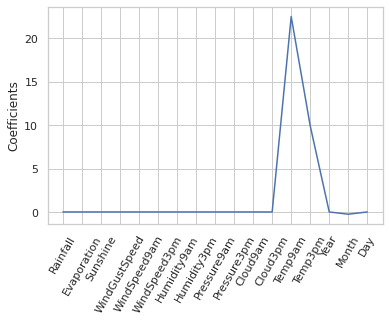

In [0]:
from sklearn.linear_model import Lasso
lassoX = X[numerical]
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X[numerical],y).coef_
_ = plt.plot(range(17),lasso_coef)
_ = plt.xticks(range(17),X[numerical],rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()


Temprature readings at different time in the day are the most important features which is in accordance with the assumptions earlier.

Treating Categorical variables


In [0]:
categorical = [var for var in X.columns if X[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 5 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [0]:
X[categorical].isnull().sum()

Location           0
WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64

Replacing missing values with mode

In [0]:
for column in ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']:
    X[column].fillna(X[column].mode()[0], inplace=True)

In [0]:
X[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [0]:
X.head()

,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,Albury,0.3,0.328767,0.586207,W,0.575758,W,WNW,0.540541,0.615385,0.646341,0.22,0.237467,0.289062,0.888889,0.555556,0.498652,0.507692,No,0.1,1.0,0.000000
1,Albury,0.0,0.328767,0.586207,WNW,0.575758,NNW,WSW,0.108108,0.564103,0.317073,0.25,0.313984,0.307292,0.555556,0.555556,0.506739,0.571795,No,0.1,1.0,0.033333
2,Albury,0.0,0.328767,0.586207,WSW,0.606061,W,WSW,0.513514,0.666667,0.243902,0.30,0.234828,0.330729,0.555556,0.222222,0.609164,0.543590,No,0.1,1.0,0.066667
3,Albury,0.0,0.328767,0.586207,NE,0.272727,SE,E,0.297297,0.230769,0.329268,0.16,0.498681,0.437500,0.555556,0.555556,0.530997,0.628205,No,0.1,1.0,0.100000
4,Albury,0.5,0.328767,0.586207,W,0.530303,ENE,NW,0.189189,0.512821,0.780488,0.33,0.319261,0.260417,0.777778,0.888889,0.522911,0.710256,No,0.1,1.0,0.133333


One hot encoding of categorical values


In [0]:
X = pd.get_dummies(X, drop_first=True)

In [0]:
X.head()

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,...,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,0.3,0.328767,0.586207,0.575758,0.540541,0.615385,0.646341,0.22,0.237467,0.289062,0.888889,0.555556,0.498652,0.507692,0.1,1.0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.0,0.328767,0.586207,0.575758,0.108108,0.564103,0.317073,0.25,0.313984,0.307292,0.555556,0.555556,0.506739,0.571795,0.1,1.0,0.033333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.0,0.328767,0.586207,0.606061,0.513514,0.666667,0.243902,0.30,0.234828,0.330729,0.555556,0.222222,0.609164,0.543590,0.1,1.0,0.066667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.0,0.328767,0.586207,0.272727,0.297297,0.230769,0.329268,0.16,0.498681,0.437500,0.555556,0.555556,0.530997,0.628205,0.1,1.0,0.100000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.5,0.328767,0.586207,0.530303,0.189189,0.512821,0.780488,0.33,0.319261,0.260417,0.777778,0.888889,0.522911,0.710256,0.1,1.0,0.133333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Creating a pipeline for the Reading and preprocessing of the data.

In [0]:
def calculateIQR(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  return IQR,Q1,Q3

In [0]:
def treatOutliers(df,numerical):
  IQR,Q1,Q3= calculateIQR(df)
  for col in numerical:
    col_median=df[col].median()
    df[col] = np.where(df[col] > (Q3[col] + 1.5 * IQR[col]) , col_median,df[col])
    df[col] = np.where(df[col] < (Q1[col] - 1.5 * IQR[col]) , col_median,df[col])


  return df

In [0]:
def imputeNumericMissing(df,numerical):
  for col in numerical:
    col_median=df[col].median()
    df[col].fillna(col_median, inplace=True)
    
  return df 

In [0]:
def dropUnwantedColumns(df):
  
  df.drop(['RISK_MM'], axis=1, inplace=True)
  df.drop(['RainTomorrow'], axis=1, inplace=True)
  return df


In [0]:
def engineerDate(df):
   df['Date'] = pd.to_datetime(df['Date'])
   df['Year'] = df['Date'].dt.year
   df['Month'] = df['Date'].dt.month
   df['Day'] = df['Date'].dt.day
   df.drop('Date', axis=1, inplace = True)
   return df

In [0]:

def readFile():
  uploaded = files.upload()
  df = pd.read_csv(io.BytesIO(uploaded['weatherAUS.csv']))
  return df


In [0]:
def getTargetsandFeatures(df):
  df['AverageTemp'] = df[['Temp9am','Temp3pm']].mean(axis=1)
  y = df['AverageTemp']
  X = df
  X.drop('AverageTemp', axis=1, inplace = True)
  X.drop('MinTemp', axis=1, inplace = True)
  X.drop('MaxTemp', axis=1, inplace = True)
  return X,y



In [0]:
from sklearn.preprocessing import MinMaxScaler

def scaleNumericData(X,numerical):
  scaler = MinMaxScaler()
  X[numerical] = scaler.fit_transform(X[numerical])
  return X

In [0]:
def imputeCategoricalMissing(X,categorical):
  for column in ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']:
    X[column].fillna(X[column].mode()[0], inplace=True)

  return X

In [0]:
def encodeCategorical(X):
  X = pd.get_dummies(X, drop_first=True)
  return X

In [0]:
def correctnumerical(numerical):
  numerical.remove('MinTemp')
  numerical.remove('MaxTemp')


In [0]:

import numpy as np
import pandas as pd
from google.colab import files
import io

def readAndPreprocess():
  df = readFile()
  df = dropUnwantedColumns(df)
  categorical = [var for var in df.columns if df[var].dtype=='O']
  df = engineerDate(df)
  numerical = [var for var in df.columns if df[var].dtype!='O']
  df = imputeNumericMissing(df,numerical)
  df = treatOutliers(df,numerical)
  X,y = getTargetsandFeatures(df)
  correctnumerical(numerical)
  X = scaleNumericData(X,numerical)
  X = imputeCategoricalMissing(X,categorical)
  X = encodeCategorical(X)
  return X,y

In [0]:
X ,y= readAndPreprocess()

Saving weatherAUS.csv to weatherAUS (4).csv


In [0]:
X

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,...,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,0.400000,0.517857,0.526316,0.603448,0.540541,0.615385,0.646341,0.22,0.199396,0.256716,0.888889,0.500,0.498638,0.507812,0.1,1.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.000000,0.517857,0.526316,0.603448,0.108108,0.564103,0.317073,0.25,0.287009,0.277612,0.555556,0.500,0.506812,0.572917,0.1,1.000000,0.033333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.000000,0.517857,0.526316,0.637931,0.513514,0.666667,0.243902,0.30,0.196375,0.304478,0.555556,0.125,0.610354,0.544271,0.1,1.000000,0.066667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.000000,0.517857,0.526316,0.258621,0.297297,0.230769,0.329268,0.16,0.498489,0.426866,0.555556,0.500,0.531335,0.630208,0.1,1.000000,0.100000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.666667,0.517857,0.526316,0.551724,0.189189,0.512821,0.780488,0.33,0.293051,0.223881,0.777778,0.875,0.523161,0.713542,0.1,1.000000,0.133333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0.000000,0.517857,0.526316,0.379310,0.405405,0.333333,0.500000,0.27,0.712991,0.677612,0.555556,0.500,0.294278,0.484375,1.0,0.454545,0.633333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
142189,0.000000,0.517857,0.526316,0.379310,0.351351,0.282051,0.402439,0.24,0.709970,0.650746,0.555556,0.500,0.313351,0.523437,1.0,0.454545,0.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
142190,0.000000,0.517857,0.526316,0.224138,0.351351,0.230769,0.463415,0.21,0.676737,0.614925,0.555556,0.500,0.335150,0.578125,1.0,0.454545,0.700000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
142191,0.000000,0.517857,0.526316,0.482759,0.243243,0.230769,0.426829,0.24,0.601208,0.546269,0.555556,0.500,0.378747,0.619792,1.0,0.454545,0.733333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
y

0         19.35
1         20.75
2         22.10
3         22.30
4         23.75
          ...  
142188    15.15
142189    16.25
142190    17.70
142191    19.30
142192    20.55
Name: AverageTemp, Length: 142193, dtype: float64

Creating a module for results of different algorithms for the prediction.
The models are used with the default hyperparameters and the best model from this will be used for the grid search for hyperparameter tuning.

The Mean squared error, Explained variance score and R2 score is used for model evaluation.

In [0]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error



def experimentModule(X,y):
  models = []
  models.append(('DT', DecisionTreeRegressor(random_state=0)))
  models.append(('RF', RandomForestRegressor(random_state=0)))
  models.append(('Linear', LinearRegression()))
  models.append(('Ridge', Ridge()))



  names = []
  r2 = []
  mse = []
  evs=[]
  model_fits = []
  

  
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=0)

  for name, model in models:
    model_fit = model.fit(X_train, y_train)
    names.append(name)
    r2.append(r2_score(y_test, model_fit.predict(X_test)))
    mse.append(mean_squared_error(y_test, model_fit.predict(X_test)))
    evs.append(explained_variance_score(y_test, model_fit.predict(X_test)))
    model_fits.append(model_fit)



  return names,models,r2,mse,evs




In [0]:
names,models,r2,mse,evs = experimentModule(X,y)

In [0]:
names

['DT', 'RF', 'Linear', 'Ridge']

In [0]:
models

[('DT', DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=0, splitter='best')),
 ('RF', RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=None, oob_score=False,
                        random_state=0, verbose=0, warm_start=False)),
 ('Linear',
  LinearRegression(copy_X=True, fit_intercept=True, n_

In [0]:
r2

[0.9998907293803685, 0.9999740324363979, 1.0, 0.9999999073032076]

In [0]:
mse

[0.004320174410427121,
 0.001026665760232543,
 1.17059931750643e-28,
 3.6649038091659037e-06]

In [0]:
evs

[0.9998907293892643, 0.9999740342829364, 1.0, 0.9999999073033079]

Simple linear regression turns out to be the best model with respect to all the three evaluation metrics,ridge being very close behind, so a hyperparameter search is not needed and Linear Regression is the selected.

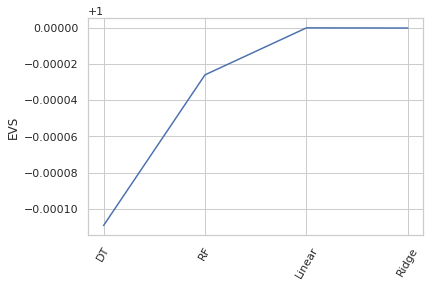

In [0]:
import matplotlib.pyplot as plt

_ = plt.plot(range(4),evs)
_ = plt.xticks(range(4),names,rotation=60)
_ = plt.ylabel('EVS')
plt.show()

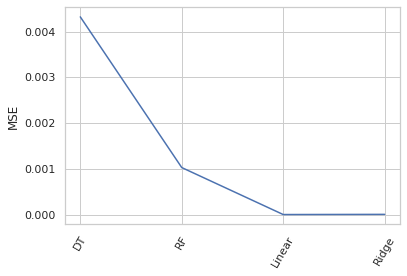

In [0]:
import matplotlib.pyplot as plt

_ = plt.plot(range(4),mse)
_ = plt.xticks(range(4),names,rotation=60)
_ = plt.ylabel('MSE')
plt.show()

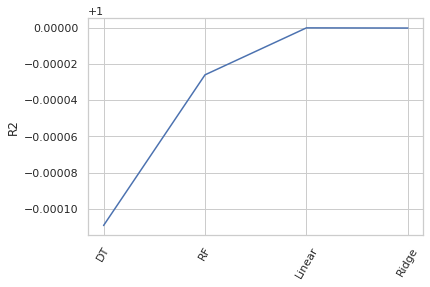

In [0]:
import matplotlib.pyplot as plt

_ = plt.plot(range(4),r2)
_ = plt.xticks(range(4),names,rotation=60)
_ = plt.ylabel('R2')
plt.show()

Exporting the trained model

In [0]:
import pickle

pickle.dump(models[2][1], open('model.pkl', 'wb'))

files.download('model.pkl')

Testing the model after loading from local machine

In [0]:
import pickle

from google.colab import files
uploaded = files.upload()
import io
import pandas as pd
model = pickle.load(io.BytesIO(uploaded['model.pkl']))


Saving model.pkl to model (1).pkl


In [0]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Creating a function for test time 


The encoding and scaling of the data should be same at run time and due to the amount and mixed nature of features, a data frame is prepared for the deployment.The subset of steps which have to be followed for both the new input features on the web interface and training are left out to be followed in the flask program.

All other required steps are followed here.

In [0]:
df = readFile()


Saving weatherAUS.csv to weatherAUS (8).csv


In [0]:
import numpy as np



df = dropUnwantedColumns(df)
categorical = [var for var in df.columns if df[var].dtype=='O']
df = engineerDate(df)
numerical = [var for var in df.columns if df[var].dtype!='O']

df = imputeNumericMissing(df,numerical)
df = treatOutliers(df,numerical)
X,y = getTargetsandFeatures(df)
correctnumerical(numerical)
X = imputeCategoricalMissing(X,categorical)


As the encoding of categorical values have to be same in deployed model,all categorical values have to be present at least once in the dataframe, and the most frequency is of the 'Location' variable with 49 values.

After experimentation the minimum columns to be considered for a subset such that the encoding would be correct were 2, namely Location and RainToday.

Checking frequency of categorical values before removing rows

In [0]:

categorical = [var for var in df.columns if df[var].dtype=='O']

In [0]:
df[categorical].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [0]:
a = X.drop_duplicates(subset=['Location','RainToday'], keep='first')

After removing rows

In [0]:
a[categorical].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

The distribution is same and we can now use this dataframe in deployment

In [0]:
a.shape

(98, 22)

In [0]:
a.to_csv('standard.csv')

In [0]:
files.download('standard.csv')